# 인공지능과 가위바위보 하기
- 오늘은 텐서플로우(TensorFlow)의 표준 API인 tf.keras의 Sequential API를 이용하여 숫자 손글씨 인식기를 만들 거예요.
- 구글(Google)에서 오픈소스로 제공하는 텐서플로우는 가장 널리 사용되고 있는 머신러닝 라이브러리 중 하나입니다.
- 앞으로 딥러닝 구현 실습은 Tensorflow 버전 2.6.0에서 진행될 예정입니다.

# 1. 데이터 준비

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.6.0
60000


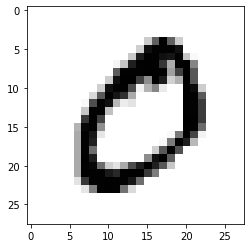

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [3]:
#Y항목(위 코드의 y_train, y_test)에는 X항목에 들어있는 이미지에 대응하는 실제 숫자 값이 담겨 있다
print(y_train[1])

0


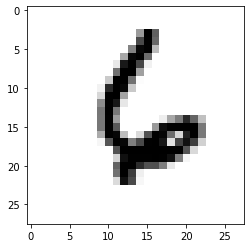

59001 번째 이미지의 숫자는 바로  6 입니다.


In [5]:
# index에 0에서 59999 사이 숫자를 지정해 보세요. (6만개의 train 데이터 중 고르기)
index=59000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [6]:
#28x28 크기의 숫자 이미지가 60,000장이 있다
print(x_train.shape)

(60000, 28, 28)


In [7]:
#10,000장의 시험용 데이터가 저장되어 있음
print(x_test.shape)

(10000, 28, 28)


# 2. 데이터 전처리

In [8]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


* 인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0~1 사이의 값으로 정규화 시켜주는 것이 좋다. max값으로 모든 값을 나눠주면 된다.

In [9]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


# 3. 딥러닝 네트워크 설계
- Sequential API는 개발의 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법입니다. 
- Sequential API 외에도 Functional API를 이용하는 방법, 밑바닥부터 직접 코딩하는 방법 등 여러 방법이 있습니다.

In [10]:
#tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [11]:
#딥러닝 네트워크 모델을 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

# 4. 딥러닝 네트워크 학습

-  우리가 만든 네트워크의 입력은 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 와 같은 형태를 가집니다. 
- 이전 스텝에서 첫 번째 레이어에 input_shape=(28,28,1)로 지정했던 것을 기억하시나요?
- 그런데 print(x_train.shape) 을 해보면, (60000, 28, 28) 로 채널수에 대한 정보가 없습니다. 
- 따라서 (60000, 28, 28, 1) 로 만들어 주어야 합니다 
- 여기서 채널수 1은 흑백 이미지를 의미합니다. 컬러 이미지라면 R, G, B 세 가지 값이 있기 때문에 3이겠죠?

In [12]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [13]:
#epochs=10 은 전체 60,000개의 데이터를 10번 반복 사용해서 학습을 시키라는 뜻
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 34s 17ms/step - loss: 0.1852 - accuracy: 0.9436
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0588 - accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0438 - accuracy: 0.9868
Epoch 4/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0341 - accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0275 - accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 7/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0194 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0158 - accuracy: 0.9952
Epoch 9/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0133 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 69s 37m

* 사실 위의 인식 정확도는 학습용 데이터(x_train)을 가지고 구한 것입니다. 즉, 연습문제를 잘푸는 인공지능을 만든 거죠. 
* 그럼 이제 실제 시험용 데이터 x_test 를 가지고 확인

# 5. 테스트 데이터로 성능 확인하기

In [14]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 2s - loss: 0.0466 - accuracy: 0.9890
test_loss: 0.04656141996383667
test_accuracy: 0.9890000224113464


* 정확도가 98% 로, 테스트의 99% 보다 적다. 그 이유는 학습용 데이터와 시험용 데이터의 손글씨 주인이 다르기 때문. 즉, 한 번도 본 적이 없는 필체의 손글씨가 섞여 있을 가능성이 높아, 인식률이 떨어지는 것은 어느 정도 예상 가능한 일이었습니다.
* model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있습니다. 눈으로 확인해봅니다.

In [15]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1) #확률값이 최대인 것

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.0488160e-11 1.9809958e-09 2.4576801e-09 2.3433829e-08 3.9478551e-10
 9.7564383e-13 6.9617045e-16 9.9999905e-01 7.4510814e-11 9.6356325e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


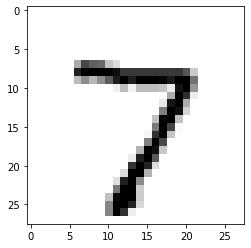

In [16]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

* model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인

예측확률분포: [2.0013148e-13 1.2802963e-10 6.2282372e-04 9.9928838e-01 7.0886076e-17
 5.0587624e-15 5.8723582e-10 1.0679793e-12 8.8873458e-05 7.2179068e-13]
라벨: 8, 예측결과: 3


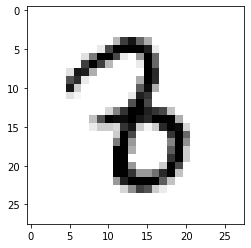

예측확률분포: [1.99863837e-09 8.64161009e-09 2.78774332e-02 5.06103098e-01
 5.54225069e-11 8.02047484e-10 4.18761609e-10 1.14774070e-06
 4.65898454e-01 1.19921184e-04]
라벨: 2, 예측결과: 3


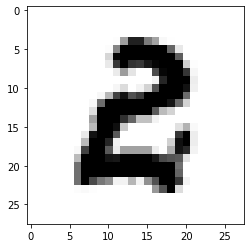

예측확률분포: [7.3000026e-12 5.6214200e-10 5.6622579e-10 5.4256816e-07 2.9215105e-02
 2.3357707e-10 1.3506758e-13 6.3154829e-08 4.2645345e-07 9.7078383e-01]
라벨: 4, 예측결과: 9


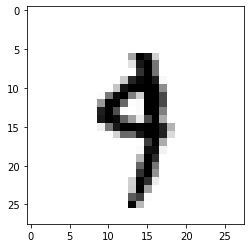

예측확률분포: [1.1680264e-10 2.6207843e-08 3.6624988e-06 9.9965823e-01 1.1367411e-08
 3.3630879e-04 1.9788299e-12 2.0745985e-09 1.1067912e-07 1.7264719e-06]
라벨: 5, 예측결과: 3


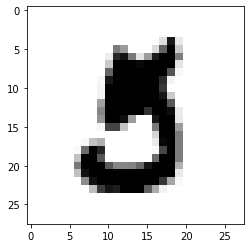

예측확률분포: [7.8217459e-09 1.1719027e-01 1.9186898e-03 8.8081259e-01 5.2759970e-06
 6.5416862e-05 2.4882584e-07 6.1651776e-06 8.7769905e-07 3.9764566e-07]
라벨: 1, 예측결과: 3


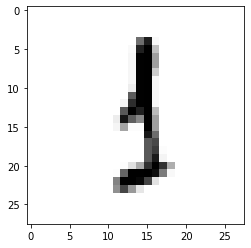

In [18]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

* 틀린 경우를 살펴보면 model도 추론 결과에 대한 확신도가 낮고 매우 혼란스러워 한다는 것을 알 수 있습니다. model의 추론 결과를 시각화하여 살펴보는 것은 향후 model 성능 개선에 도움이 되는 아이디어를 얻을 수 있는 좋은 방법 중 하나

# 6. 더 좋은 네트워크 만들어 보기
- 3번 과정인 <딥러닝 네트워크 설계하기>에서 살펴본 하이퍼파라미터들을 바꾸어 보면 좋은 모델을 만들 수 있다
- Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여 보거나,
- Dense 레이어에서 뉴런수를 바꾸어 보거나, 
- 학습 반복 횟수인 epoch 값을 변경해 보는 등

In [22]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               